## Data Prep CA1

### Contents
1. Introduction
2. Functions used
3. Results
4. Conclusion

### 1. Introduction

This assignment will investigate a dataset containing "APS Failure and Operational Data for Scania Trucks".

<b>1.1 Theory

PCA, dimensionality reduction. LASSO/Ridge Comparisons for dimensionality reduction. Coerrelation. Evaluating dimensionality reduction.

<b>1.2 Library Imports

The following libraries are used in this assignment.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

<b>1.3 Initial Dataset Load

The dataset used is of "APS Failure and Operational Data for Scania Trucks".

In [2]:
df = pd.read_csv("aps_failure_set.csv")

### 2. Selection of Functions Used

In [3]:
def prelim(df):
    print(f"Dataframe Shape: {df.shape} \n")
    print(f"Dataframe statistical information: \n{df.describe()} \n")
    print(f"Object datatype statistical information: \n{df.describe(include=object)} \n")
    print(f"Dataframe info function: \n{df.info()} \n")
    print(df.isnull().sum())

In [4]:
# function that views the missing values of the first x row's
def missing_values_vis(df, end_row):
    subset_1 = df.iloc[:end_row, :85]
    subset_2 = df.iloc[:end_row, 85:]

    fig, axes = plt.subplots(2, 1, figsize=(15, 15))

    msno.matrix(subset_1, ax=axes[0], sparkline=False)
    axes[0].set_title('Subset 1: Missing Values in Features 1 - 84')

    msno.matrix(subset_2, ax=axes[1], sparkline=False)
    axes[1].set_title('Subset 2: Missing Values in Features 85 - 171')
    plt.show()

### 3. Results

<b>3.1 First EDA

Using pandas functions for summary statistics some things are noticed. There are 60000 entries and 171 features. 170 of the 171 columns are categories.

In this case, the pandas head and describe functions both reveal something about the dataset. While some of the features explored seem numerical, they have values of "na".

In [5]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [6]:
prelim(df)

Dataframe Shape: (60000, 171) 

Dataframe statistical information: 
             aa_000
count  6.000000e+04
mean   5.933650e+04
std    1.454301e+05
min    0.000000e+00
25%    8.340000e+02
50%    3.077600e+04
75%    4.866800e+04
max    2.746564e+06 

Object datatype statistical information: 
        class ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002 ag_003  \
count   60000  60000  60000  60000  60000  60000  60000  60000  60000  60000   
unique      2     30   2062   1887    334    419    155    618   2423   7880   
top       neg     na      0     na      0      0      0      0      0      0   
freq    59000  46329   8752  14861  55543  55476  59133  58587  56181  46894   

        ... ee_002 ee_003 ee_004 ee_005 ee_006 ee_007 ee_008 ee_009 ef_000  \
count   ...  60000  60000  60000  60000  60000  60000  60000  60000  60000   
unique  ...  34489  31712  35189  36289  31796  30470  24214   9725     29   
top     ...      0      0      0      0      0      0      0      0      

<b>3.2 Setting null values

A quick way to remedy this is to reload the dataset setting "na" as a null value. By default, Pandas does not include "na" as a null value*, and this can be added with the na_values function.

**source: pandas documentation https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html*

In [7]:
df = pd.read_csv("aps_failure_set.csv", na_values="na")

In [8]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [9]:
df["ee_002"].describe()

count    5.932900e+04
mean     4.454897e+05
std      1.155540e+06
min      0.000000e+00
25%      2.936000e+03
50%      2.337960e+05
75%      4.383960e+05
max      7.793393e+07
Name: ee_002, dtype: float64

<b>3.3 Second EDA

Now when the same statistical function is performed only one feature remains categorical, and the other features have been automatically loaded as numerical.

In [10]:
prelim(df)

Dataframe Shape: (60000, 171) 

Dataframe statistical information: 
             aa_000        ab_000        ac_000        ad_000        ae_000  \
count  6.000000e+04  13671.000000  5.666500e+04  4.513900e+04  57500.000000   
mean   5.933650e+04      0.713189  3.560143e+08  1.906206e+05      6.819130   
std    1.454301e+05      3.478962  7.948749e+08  4.040441e+07    161.543373   
min    0.000000e+00      0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    8.340000e+02      0.000000  1.600000e+01  2.400000e+01      0.000000   
50%    3.077600e+04      0.000000  1.520000e+02  1.260000e+02      0.000000   
75%    4.866800e+04      0.000000  9.640000e+02  4.300000e+02      0.000000   
max    2.746564e+06    204.000000  2.130707e+09  8.584298e+09  21050.000000   

             af_000        ag_000        ag_001        ag_002        ag_003  \
count  57500.000000  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04   
mean      11.006817  2.216364e+02  9.757223e+02  8.606015e+03 

<b>Statistical Analysis

Investigate differences in figures

<b>Missing Values

Now that the "na" values are correctly recognised as missing values they can be visualised.

Below a matrix of missing values is shown using the Missingno library, with white horizontal bands showing rows with groupings of missing data and vertical bars indicating features with missing data (slighter vertical bars indicate a separation of features).

Missingno matrix can be hard to interpid with a lot of data, and by limiting the data viewed patterns emerge.This indicates non random missing data (Harrison, 2019).

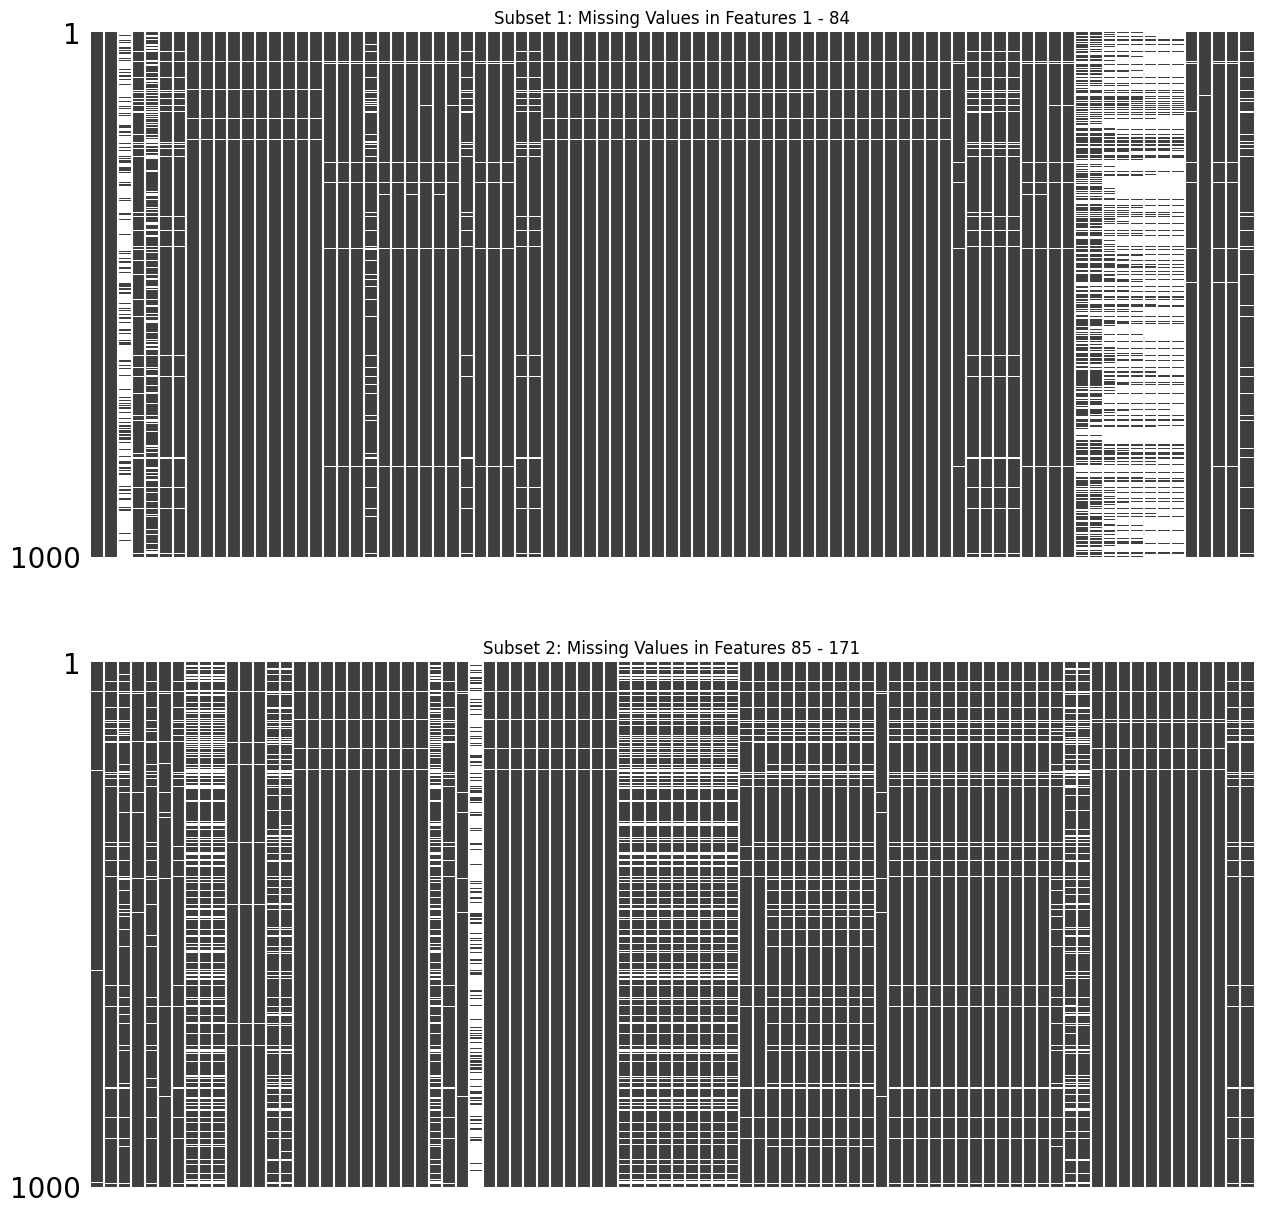

In [11]:
missing_values_vis(df, 1000)

<b> Target variable

The target variable has no missing data, but what impact do rows with high missing data have on the target variable?

In [12]:
df["class"].isnull().sum()

0

In [13]:
df["class"].value_counts()

class
neg    59000
pos     1000
Name: count, dtype: int64

<b>Features with high missing data

Plot features that have high missing data... one band in subset one with high missing data..

<b>3.4 Feature Count

The above statistical view only shows a snapshot of information from the total features. 

Issues with the above statisticall analysis.. too much information.. some standard methods unsuable, pairplot etc.
Are their ways we can make statements about the data?

<b>Dimensionality Reduction

<b>Conclusion

<b>References